In [1]:
# You are allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt
from dynamics_pendulum2 import pendulum
import pygame as pg
from scipy.optimize import minimize 
from pygame import gfxdraw
import cma

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# Your code here
state_num=2
#action_num=100
order=3
d=(order+1)**state_num
#d_a=d*action_num
f_min=-2.5
f_max=2.5

def scale(state_):
    a_ = np.array([(state_[0]+2*np.pi)/(4*np.pi) ,(state_[1]+np.pi)/(2*np.pi) ])
    return a_

def create_c(k_,n_):#number of states, order
    c_ = [[] for j in range(k_)]
    for i in range(k_):
        for j in range(int(np.power(n_ + 1,i))):
            for p in range(n_ + 1):
                for r in range(int(np.power(n_ + 1,k_- i - 1))):
                    c_[i].append(p)
    c_ = np.array(c_,dtype = np.int8)
    return c_
c=create_c(state_num,order)

def create_x_i(s_): #for v_hat
    state = scale(s_)
    x_i_=np.cos(np.pi*(np.matmul(state,c)))
    return x_i_


def policy(st,theta_mu,theta_sigma):
    mu=np.matmul(theta_mu,create_x_i(st))
    sigma=np.exp(np.matmul(theta_sigma,create_x_i(st)))
    action=np.random.normal(mu,sigma,1)
    action=np.clip(action,f_min,f_max)
    return action


In [3]:
def reward(angle):
    return np.exp((angle-(np.pi))**2)
global step_per_e
step_per_e=[]
def saving(cost_in):
    global step_per_e
    step_per_e=np.append(step_per_e,[cost_in])
def new(theta):
    theta_mu = theta[0:d]
    theta_sigma=theta[d:]
    episode = 0
    step = np.empty(0)
    #state_list = []
    #step_per_episode = []
    #reward_sum = []
    pend = pendulum()
    t = 0
    action = np.empty(0)
    s = np.zeros((1,2))# states
    s[0] = [0,0]# 
    b=1
    total_cost=0
    counter=0
    while True :
        theta=np.append(theta_mu,theta_sigma)
        real_action=policy(s[t],theta_mu,theta_sigma)
        next_a_v, angle = pend.move(s[t][0], s[t][1], real_action)
        s = np.append(s,[[next_a_v,angle]],axis=0)
        #print(next_a_v,angle)
        cost_=reward(angle)
        total_cost+=cost_
        t += 1   
        if t>200:
            saving(t-1)
            break
        if (35/36)*np.pi<angle<(37/36)*np.pi:
            counter+=1
        else:
            counter=0
        if counter==5:
            saving(t-1)
            break
        #if t%1000==0:
            #print(t, end=" ")
    #step_per_episode.append(t)
    #state_list.append(s)
    #reward_sum.append(-t)
    #return state_list,step_per_episode , reward_sum
    #print(total_cost)
    return total_cost ,s#, state_list


In [50]:
iteration_num=100
run_number=10
def eval():
    sigma0=0.25
    costs=np.empty((1,iteration_num))
    t=0
    global step_per_e
    step_per_e=[]
    for i in range(run_number):
        theta=2*d*[0]
        es = cma.CMAEvolutionStrategy(theta, sigma0).optimize(new,iterations=iteration_num)
        res=es.result
        theta=res[0]
        #sigma0=np.average(res[-2])
        file=open("outcmaes/fit.dat")
        results=[]
        for line in file:
            results += [line.split()]
        results.pop(0)
        res1=np.array(results,dtype=float)
        costs = np.append(costs,[res1[:,5]],axis=0)
        t+=1
    return costs , es,theta
costs_, es, theta=eval()
steps=np.reshape(step_per_e, (run_number*iteration_num, 14))
steps=np.min(steps, axis=1)
steps=np.reshape(steps, (run_number, iteration_num))
costs_list = np.delete(costs_, 0, axis=0)

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 32 (seed=366445, Thu Apr  1 03:50:51 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     14 5.698597093075422e+05 1.0e+00 2.31e-01  2e-01  2e-01 0:01.5


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (949114.7309211581, array([[ 0.        ,  0.        ],
       [ 0.10000619,  0.00502171],
       [ 0.23248191,  0.02171557],
       [ 0.25175372,  0.04602702],
       [ 0.27057649,  0.0722509 ],
       [ 0.40342541,  0.10609013],
       [ 0.49684175,  0.15128783],
       [ 0.41218852,  0.19692267],
       [ 0.3691062 ,  0.23614391],
       [ 0.32145534,  0.27080899],
       [ 0.37861547,  0.30595099],
       [ 0.23864702,  0.33693328],
       [ 0.28819421,  0.36337748],
       [ 0.09020433,  0.38236814],
       [ 0.06634198,  0.39022506],
       [ 0.12749512,  0.3999542 ],
       [ 0.09890223,  0.41131658],
       [ 0.01951779,  0.41725919],
       [-0.0598937 ,  0.41523214],
       [-0.12546171,  0.4059289 ],
       [-0.26014548,  0.38657433],
       [-0.29776272,  0.35857181],
       [-0.33449684,  0.32683

    2     28 4.434787010657969e+05 1.1e+00 2.21e-01  2e-01  2e-01 0:02.9


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (657985.5747456269, array([[ 0.        ,  0.        ],
       [-0.11708117,  6.2773062 ],
       [-0.00742776,  6.27105607],
       [-0.24917071,  6.25817153],
       [-0.47850032,  6.22163659],
       [-0.57094549,  6.1689486 ],
       [-0.59350842,  6.1104888 ],
       [-0.63070631,  6.04903128],
       [-0.6344113 ,  5.98552453],
       [-0.67699128,  5.91969909],
       [-0.73581898,  5.84879053],
       [-0.76198313,  5.77362614],
       [-0.25932267,  5.72238487],
       [-0.24266007,  5.69719924],
       [ 0.16403099,  5.69325777],
       [ 0.29517406,  5.71629807],
       [ 0.30232282,  5.7462775 ],
       [ 0.61873611,  5.79249775],
       [ 0.67226307,  5.85728602],
       [ 0.87254284,  5.93482181],
       [ 0.78459026,  6.01800243],
       [ 0.88585084,  6.10186011],
       [ 0.77276711,  6.18512

    3     42 2.868918452055096e+05 1.1e+00 2.19e-01  2e-01  2e-01 0:04.2
    6     84 2.350996428292066e+05 1.2e+00 2.27e-01  2e-01  2e-01 0:08.3
    9    126 1.278410786570162e+05 1.3e+00 2.42e-01  2e-01  3e-01 0:12.3
   13    182 1.563411647423888e+05 1.4e+00 2.89e-01  3e-01  3e-01 0:17.8
   18    252 9.500479436675961e+04 1.6e+00 3.42e-01  3e-01  4e-01 0:24.5
   24    336 1.196126342049426e+05 1.8e+00 3.45e-01  3e-01  4e-01 0:32.3
   30    420 1.103511557217068e+05 1.9e+00 3.67e-01  4e-01  4e-01 0:40.3
   37    518 1.210143481650314e+05 2.0e+00 3.57e-01  3e-01  4e-01 0:49.5
   46    644 8.034750434242877e+04 2.1e+00 3.10e-01  3e-01  4e-01 1:00.6
   56    784 1.055018243237648e+05 2.1e+00 3.24e-01  3e-01  4e-01 1:12.6
   67    938 7.632280594988914e+04 2.2e+00 2.85e-01  3e-01  3e-01 1:25.5
   80   1120 7.535823950857714e+04 2.2e+00 2.53e-01  2e-01  3e-01 1:39.1
   97   1358 7.550553050812011e+04 2.3e+00 2.20e-01  2e-01  2e-01 1:53.7
  100   1400 7.466283751556167e+04 2.3e+00 2.08e-01

/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (898386.6648403367, array([[ 0.00000000e+00,  0.00000000e+00],
       [-2.47835253e-01,  6.27074052e+00],
       [-1.42281443e-01,  6.25115538e+00],
       [-1.01277836e-01,  6.23892771e+00],
       [ 9.71832400e-02,  6.23872368e+00],
       [ 1.34235134e-01,  6.25034245e+00],
       [ 1.87754021e-01,  6.26650854e+00],
       [ 3.01018404e-01,  7.86328600e-03],
       [ 5.37373020e-01,  4.99571286e-02],
       [ 7.47274084e-01,  1.14454461e-01],
       [ 7.39129580e-01,  1.89076604e-01],
       [ 3.81342757e-01,  2.45322032e-01],
       [ 3.23237890e-01,  2.80690420e-01],
       [ 4.28388826e-01,  3.18420276e-01],
       [ 5.13564295e-01,  3.65701057e-01],
       [ 5.75229325e-01,  4.20347980e-01],
       [ 3.61337939e-01,  4.67348258e-01],
       [ 2.46736366e-01,  4.97861648e-01],
       [ 8.37845465e-03, 

    2     28 3.648868397989487e+05 1.1e+00 2.24e-01  2e-01  2e-01 0:02.8


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (1119923.3830045478, array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.39681509e-01,  6.27617134e+00],
       [ 1.15120195e-01,  6.27494036e+00],
       [-8.29027715e-02,  6.27655620e+00],
       [-1.54130078e-01,  6.26465523e+00],
       [ 1.06643767e-01,  6.26227334e+00],
       [ 1.34164085e-01,  6.27436347e+00],
       [ 3.82881198e-01,  1.71388117e-02],
       [ 4.01705750e-01,  5.65295214e-02],
       [ 2.44195303e-01,  8.89556880e-02],
       [ 2.58415456e-01,  1.14189152e-01],
       [ 1.13766258e-01,  1.32872947e-01],
       [ 2.94263961e-01,  1.53359006e-01],
       [ 1.23517395e-01,  1.74331363e-01],
       [ 1.44834767e-01,  1.87803422e-01],
       [-1.07919109e-01,  1.89654538e-01],
       [ 5.08754625e-02,  1.86792166e-01],
       [ 1.46882496e-01,  1.96720780e-01],
       [-1.99810658e-01,

    3     42 4.062081865935661e+05 1.1e+00 2.15e-01  2e-01  2e-01 0:04.3
    6     84 2.617064217109656e+05 1.1e+00 2.05e-01  2e-01  2e-01 0:08.4
    9    126 2.225468353481130e+05 1.2e+00 2.10e-01  2e-01  2e-01 0:12.7
   13    182 2.237610052789475e+05 1.3e+00 2.21e-01  2e-01  2e-01 0:18.3
   18    252 2.320979791246745e+05 1.4e+00 2.24e-01  2e-01  2e-01 0:25.3
   24    336 1.635975733525204e+05 1.4e+00 2.50e-01  2e-01  3e-01 0:33.6
   31    434 1.279102970009141e+05 1.6e+00 2.66e-01  3e-01  3e-01 0:42.7
   38    532 1.741072173315934e+05 1.6e+00 2.49e-01  2e-01  3e-01 0:52.2
   47    658 1.032847736803460e+05 1.8e+00 2.78e-01  3e-01  3e-01 1:03.1
   58    812 8.148399650825809e+04 2.1e+00 4.23e-01  4e-01  5e-01 1:14.5
   72   1008 8.095199959542858e+04 2.4e+00 4.39e-01  4e-01  6e-01 1:26.7
   87   1218 7.924174275920873e+04 2.5e+00 5.15e-01  5e-01  7e-01 1:40.4
  100   1400 7.767754116509683e+04 2.8e+00 7.34e-01  7e-01  9e-01 1:52.1
(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 32

/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (627474.9685212725, array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.30137023e-01,  6.27665061e+00],
       [-7.82657930e-02,  6.26618806e+00],
       [-7.62272498e-02,  6.25843174e+00],
       [-1.95251367e-01,  6.24480103e+00],
       [-1.26106562e-01,  6.22866771e+00],
       [-1.42255993e-01,  6.21519437e+00],
       [-1.46611134e-01,  6.20069177e+00],
       [-1.56885493e-01,  6.18545470e+00],
       [-1.13852491e-01,  6.17186280e+00],
       [-1.65417452e-01,  6.15784186e+00],
       [-7.04951086e-02,  6.14599895e+00],
       [ 2.70880275e-02,  6.14382058e+00],
       [ 7.18722075e-02,  6.14878912e+00],
       [ 7.12807886e-02,  6.15597587e+00],
       [ 1.17287069e-01,  6.16544312e+00],
       [ 1.14265041e-01,  6.17706793e+00],
       [ 3.21929698e-01,  6.19896867e+00],
       [ 4.24128132e-01, 

    2     28 2.662629558696325e+05 1.1e+00 2.33e-01  2e-01  2e-01 0:02.8


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (438195.91462387703, array([[ 0.        ,  0.        ],
       [-0.1439033 ,  6.27595935],
       [-0.08306186,  6.26456494],
       [-0.17056331,  6.25183082],
       [ 0.01231877,  6.24388762],
       [ 0.10286614,  6.24967123],
       [ 0.36439675,  6.2731326 ],
       [ 0.52555058,  0.03462895],
       [ 0.41253716,  0.08172492],
       [ 0.31522935,  0.1182613 ],
       [ 0.17275421,  0.14275873],
       [ 0.07789828,  0.15534151],
       [-0.13514957,  0.15246553],
       [-0.3200959 ,  0.12960906],
       [-0.54826702,  0.08601155],
       [-0.68517699,  0.02408503],
       [-0.77966788,  6.2337262 ],
       [-0.89640369,  6.14957853],
       [-0.93091369,  6.05784282],
       [-0.96873401,  5.96248418],
       [-0.76547085,  5.87544278],
       [-0.46649221,  5.81361812],
       [-0.19854611,  5.7802

    3     42 4.026433252684948e+05 1.1e+00 2.30e-01  2e-01  2e-01 0:04.2
    6     84 2.213853428574050e+05 1.2e+00 2.43e-01  2e-01  3e-01 0:08.4
    9    126 2.050881747970715e+05 1.3e+00 2.64e-01  3e-01  3e-01 0:12.6
   13    182 1.053591740595532e+05 1.4e+00 2.65e-01  3e-01  3e-01 0:17.7
   18    252 1.004277794286724e+05 1.5e+00 2.85e-01  3e-01  3e-01 0:24.1
   24    336 9.163625407766455e+04 1.6e+00 3.13e-01  3e-01  3e-01 0:31.4
   32    448 7.883096737006451e+04 1.9e+00 4.34e-01  4e-01  5e-01 0:39.8
   43    602 7.955868127808635e+04 2.2e+00 5.87e-01  6e-01  7e-01 0:49.6
   56    784 7.458851666015160e+04 2.4e+00 5.19e-01  5e-01  6e-01 0:59.7
   73   1022 7.388217149904014e+04 2.6e+00 4.79e-01  4e-01  6e-01 1:10.8
   91   1274 7.413548787621877e+04 2.7e+00 3.99e-01  4e-01  5e-01 1:23.4
  100   1400 7.372546416859413e+04 2.7e+00 3.61e-01  3e-01  4e-01 1:28.4
(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 32 (seed=324646, Thu Apr  1 03:56:08 2021)
Iterat #Fevals   function value 

/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (617200.0565040554, array([[ 0.00000000e+00,  0.00000000e+00],
       [ 7.61827955e-02,  3.82544055e-03],
       [ 7.75182873e-02,  1.15421088e-02],
       [ 1.07108484e-02,  1.59711455e-02],
       [ 1.94383976e-01,  2.62695832e-02],
       [ 2.14265533e-01,  4.67861908e-02],
       [ 3.86814970e-02,  5.94839963e-02],
       [-7.24372437e-02,  5.77883497e-02],
       [ 7.11503000e-02,  5.77249424e-02],
       [ 8.13945541e-03,  6.17051764e-02],
       [-8.54835288e-02,  5.78213159e-02],
       [-7.20302601e-02,  4.99133890e-02],
       [-1.87717490e-01,  3.68716829e-02],
       [-1.23270993e-01,  2.12588839e-02],
       [ 8.14804088e-02,  1.91624814e-02],
       [ 1.60142474e-01,  3.12939459e-02],
       [-1.51677174e-02,  3.85709995e-02],
       [-1.76852647e-01,  2.89291722e-02],
       [-2.22126858e-01, 

    2     28 3.921737816574905e+05 1.1e+00 2.33e-01  2e-01  2e-01 0:02.9


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (464237.5348904469, array([[ 0.00000000e+00,  0.00000000e+00],
       [ 2.39445008e-01,  1.20234846e-02],
       [ 1.20361699e-01,  3.00867817e-02],
       [ 7.23158187e-02,  3.97598478e-02],
       [ 1.64965217e-02,  4.42182425e-02],
       [ 6.49835578e-02,  4.83093867e-02],
       [ 1.01143416e-01,  5.66501471e-02],
       [ 5.89765680e-02,  6.46886554e-02],
       [ 1.93043159e-01,  7.73424489e-02],
       [ 7.38716788e-02,  9.07418675e-02],
       [ 6.38689381e-02,  9.76570166e-02],
       [ 2.35717804e-01,  1.12699049e-01],
       [ 3.85432641e-01,  1.43884482e-01],
       [ 3.26975603e-01,  1.79648943e-01],
       [ 2.44064746e-01,  2.08315449e-01],
       [ 3.85197391e-01,  2.39905874e-01],
       [ 2.37206402e-01,  2.71148578e-01],
       [ 2.44130568e-01,  2.95310491e-01],
       [ 1.91309169e-01, 

    3     42 2.990451939898892e+05 1.1e+00 2.34e-01  2e-01  2e-01 0:04.2
    6     84 1.746449526612505e+05 1.2e+00 2.36e-01  2e-01  2e-01 0:08.4
    9    126 2.501140415505661e+05 1.3e+00 2.49e-01  2e-01  3e-01 0:12.5
   13    182 2.017848548453407e+05 1.3e+00 2.47e-01  2e-01  3e-01 0:18.0
   18    252 1.915063262292985e+05 1.4e+00 2.38e-01  2e-01  2e-01 0:24.8
   24    336 1.367786578103333e+05 1.4e+00 2.24e-01  2e-01  2e-01 0:32.7
   30    420 1.763280862030021e+05 1.5e+00 2.13e-01  2e-01  2e-01 0:40.9
   38    532 9.737986974290603e+04 1.5e+00 2.21e-01  2e-01  2e-01 0:51.1
   47    658 1.118375972538931e+05 1.6e+00 2.29e-01  2e-01  3e-01 1:01.1
   60    840 8.147461885383623e+04 1.8e+00 2.56e-01  2e-01  3e-01 1:13.0
   74   1036 7.891268820532392e+04 2.1e+00 2.96e-01  3e-01  3e-01 1:25.7
   89   1246 7.549629621126121e+04 2.2e+00 3.46e-01  3e-01  4e-01 1:39.1
  100   1400 7.450732486496468e+04 2.5e+00 3.54e-01  3e-01  4e-01 1:47.1
(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 32

/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (1197414.9834736972, array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.38692689e-01,  6.27622100e+00],
       [-1.07848525e-01,  6.26384351e+00],
       [ 5.92714844e-02,  6.26140607e+00],
       [ 1.70466448e-01,  6.27294113e+00],
       [ 2.40262154e-01,  1.03772780e-02],
       [ 1.23102163e-01,  2.86192055e-02],
       [-9.28657853e-02,  3.01354270e-02],
       [-2.39886237e-01,  1.34282013e-02],
       [-3.56711227e-01,  6.26666000e+00],
       [-2.92811254e-01,  6.23405095e+00],
       [-7.72736110e-02,  6.21547256e+00],
       [ 6.93918125e-02,  6.21507800e+00],
       [ 1.87567526e-01,  6.22797968e+00],
       [ 4.26213037e-01,  6.25879679e+00],
       [ 6.46423014e-01,  2.94656341e-02],
       [ 6.07569968e-01,  9.24222682e-02],
       [ 3.76652846e-01,  1.41832396e-01],
       [ 1.68414500e-01,

    2     28 3.649400071116075e+05 1.1e+00 2.30e-01  2e-01  2e-01 0:02.9


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (472744.4441442893, array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.75632569e-01,  6.27436610e+00],
       [-2.65557247e-01,  6.25221517e+00],
       [-3.45431484e-01,  6.22153958e+00],
       [-4.93428908e-01,  6.17942344e+00],
       [-5.92862820e-01,  6.12488661e+00],
       [-6.38276395e-01,  6.06308069e+00],
       [-6.77219614e-01,  5.99704378e+00],
       [-7.43823531e-01,  5.92571397e+00],
       [-6.80626829e-01,  5.85422162e+00],
       [-5.59583807e-01,  5.79198384e+00],
       [-4.83519421e-01,  5.73964309e+00],
       [-2.70835697e-01,  5.70179612e+00],
       [-7.01804923e-02,  5.68468882e+00],
       [ 1.55471482e-01,  5.68896956e+00],
       [ 3.25576440e-01,  5.71310571e+00],
       [ 5.11865144e-01,  5.75512601e+00],
       [ 6.63924505e-01,  5.81412884e+00],
       [ 8.58612326e-01, 

    3     42 3.209164051302487e+05 1.1e+00 2.19e-01  2e-01  2e-01 0:04.2
    6     84 2.237180291772418e+05 1.1e+00 2.15e-01  2e-01  2e-01 0:08.3
    9    126 1.892002509653719e+05 1.2e+00 2.31e-01  2e-01  2e-01 0:12.4
   13    182 1.723219576933299e+05 1.4e+00 2.65e-01  3e-01  3e-01 0:17.7
   18    252 1.279153698071930e+05 1.6e+00 2.97e-01  3e-01  3e-01 0:24.1
   25    350 1.146086292687692e+05 1.7e+00 3.06e-01  3e-01  3e-01 0:32.1
   34    476 7.855607388507572e+04 1.9e+00 3.51e-01  3e-01  4e-01 0:40.7
   45    630 7.657638856866729e+04 2.1e+00 3.06e-01  3e-01  4e-01 0:50.0
   57    798 7.602543128115662e+04 2.2e+00 3.12e-01  3e-01  4e-01 1:00.6
   69    966 7.550208929442632e+04 2.3e+00 2.13e-01  2e-01  2e-01 1:12.0
   82   1148 7.524379611541994e+04 2.4e+00 1.96e-01  2e-01  2e-01 1:24.4
   96   1344 7.677657464927019e+04 2.4e+00 1.86e-01  2e-01  2e-01 1:38.3
  100   1400 7.532955645833643e+04 2.4e+00 1.74e-01  2e-01  2e-01 1:42.7
(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 32

/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (1373301.6480365964, array([[ 0.00000000e+00,  0.00000000e+00],
       [ 3.01718103e-02,  1.51504562e-03],
       [ 5.68158637e-02,  5.88253679e-03],
       [ 1.36036106e-01,  1.55654463e-02],
       [ 1.40937985e-01,  2.94711275e-02],
       [ 1.43808002e-01,  4.37669600e-02],
       [ 2.21368853e-01,  6.21014277e-02],
       [ 2.88622546e-01,  8.77061219e-02],
       [ 2.69412280e-01,  1.15721845e-01],
       [ 2.99856741e-01,  1.44301605e-01],
       [ 2.81390421e-01,  1.73481805e-01],
       [ 1.98927397e-01,  1.97594049e-01],
       [ 1.71749450e-01,  2.16202250e-01],
       [ 2.72480416e-02,  2.26190816e-01],
       [-6.21468842e-02,  2.24438133e-01],
       [-1.22469694e-01,  2.15169765e-01],
       [-2.06292940e-01,  1.98664797e-01],
       [-2.23253699e-01,  1.77100569e-01],
       [-2.60422552e-01,

    2     28 5.166499989745961e+05 1.1e+00 2.30e-01  2e-01  2e-01 0:02.9


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (978901.7723526531, array([[ 0.00000000e+00,  0.00000000e+00],
       [-2.47835253e-01,  6.27074052e+00],
       [ 1.23598639e-02,  6.25892053e+00],
       [ 2.71691013e-01,  6.27318346e+00],
       [ 3.94508377e-01,  2.34461115e-02],
       [ 6.20908827e-01,  7.44273819e-02],
       [ 8.16841847e-01,  1.46610336e-01],
       [ 7.87706239e-01,  2.27161554e-01],
       [ 4.10715228e-01,  2.87317563e-01],
       [ 5.10665103e-01,  3.33567774e-01],
       [ 5.86949932e-01,  3.88660232e-01],
       [ 1.58621338e-01,  4.26075752e-01],
       [-8.52400799e-02,  4.29756484e-01],
       [-2.54428012e-01,  4.12707986e-01],
       [-4.02570636e-01,  3.79732296e-01],
       [-3.25537765e-01,  3.43187524e-01],
       [-4.38717904e-01,  3.04824917e-01],
       [-7.22859040e-01,  2.46514053e-01],
       [-1.07157768e+00, 

    3     42 1.944415456762646e+05 1.1e+00 2.30e-01  2e-01  2e-01 0:04.2
    6     84 2.282880450053529e+05 1.2e+00 2.36e-01  2e-01  2e-01 0:08.4
    9    126 2.046641870226892e+05 1.2e+00 2.49e-01  2e-01  3e-01 0:12.4
   13    182 1.333535857724804e+05 1.4e+00 2.90e-01  3e-01  3e-01 0:17.8
   18    252 1.200366860511360e+05 1.5e+00 2.93e-01  3e-01  3e-01 0:24.2
   25    350 1.262108087900664e+05 1.6e+00 2.77e-01  3e-01  3e-01 0:32.3
   33    462 8.459683247569515e+04 1.7e+00 2.92e-01  3e-01  3e-01 0:40.8
   44    616 8.292487427164317e+04 1.8e+00 2.90e-01  3e-01  3e-01 0:49.9
   57    798 8.001522691465096e+04 1.9e+00 2.34e-01  2e-01  3e-01 1:00.5
   74   1036 7.748579518775512e+04 2.1e+00 2.18e-01  2e-01  3e-01 1:11.6
   98   1372 7.419184715630152e+04 2.2e+00 1.98e-01  2e-01  2e-01 1:23.9
  100   1400 7.534788796972031e+04 2.2e+00 2.05e-01  2e-01  2e-01 1:24.6
(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 32 (seed=307155, Thu Apr  1 04:01:03 2021)
Iterat #Fevals   function value 

/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (1119158.918441859, array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.02171617e-01,  6.27805486e+00],
       [-1.94504343e-01,  6.26315930e+00],
       [-3.15949503e-01,  6.23753071e+00],
       [-4.14230758e-01,  6.20087105e+00],
       [-3.06626431e-01,  6.16468165e+00],
       [ 6.51531803e-03,  6.14961752e+00],
       [-1.97472208e-02,  6.14895302e+00],
       [ 1.86145542e-01,  6.15730846e+00],
       [ 1.79999276e-01,  6.17569034e+00],
       [ 9.61705670e-02,  6.18955463e+00],
       [ 2.37126750e-01,  6.20628894e+00],
       [ 2.12363644e-01,  6.22885548e+00],
       [ 4.08194926e-01,  6.26001252e+00],
       [ 2.11569690e-01,  7.94120810e-03],
       [-3.24659445e-02,  1.69311674e-02],
       [ 1.53057536e-02,  1.60700290e-02],
       [ 1.15416464e-01,  2.26338492e-02],
       [-1.46369998e-01, 

    2     28 5.408011855002466e+05 1.1e+00 2.24e-01  2e-01  2e-01 0:02.8


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (1064278.0697531311, array([[ 0.00000000e+00,  0.00000000e+00],
       [ 3.74506479e-02,  1.88054513e-03],
       [-1.60221783e-02,  2.95592766e-03],
       [-8.13905162e-02,  6.28125003e+00],
       [-3.68013499e-02,  6.27531650e+00],
       [ 1.04256062e-02,  6.27399269e+00],
       [ 4.84832725e-04,  6.27454037e+00],
       [ 1.41004802e-01,  6.28164504e+00],
       [ 2.66384352e-01,  1.89139930e-02],
       [ 6.18471895e-02,  3.53913081e-02],
       [ 2.19302956e-01,  4.95078861e-02],
       [-5.81934250e-02,  5.75941081e-02],
       [ 1.35519221e-01,  6.14778921e-02],
       [ 2.49442475e-01,  8.08058761e-02],
       [ 2.59310178e-01,  1.06347737e-01],
       [ 1.01643390e-01,  1.24467797e-01],
       [-1.65227556e-01,  1.21273380e-01],
       [-1.66050994e-01,  1.04641766e-01],
       [-4.60533717e-01,

    3     42 3.102126028018741e+05 1.1e+00 2.22e-01  2e-01  2e-01 0:04.2
    6     84 2.312213127672741e+05 1.2e+00 2.23e-01  2e-01  2e-01 0:08.4
   10    140 2.112027819047591e+05 1.3e+00 2.41e-01  2e-01  2e-01 0:13.7
   14    196 1.110676938162950e+05 1.4e+00 2.40e-01  2e-01  3e-01 0:18.8
   20    280 1.065557163403606e+05 1.5e+00 2.67e-01  3e-01  3e-01 0:25.9
   27    378 8.801953900584398e+04 1.6e+00 3.46e-01  3e-01  4e-01 0:33.1
   36    504 8.351137288832909e+04 1.9e+00 4.25e-01  4e-01  5e-01 0:41.7
   48    672 7.789903393235113e+04 2.1e+00 4.27e-01  4e-01  5e-01 0:51.5
   63    882 7.573594549752418e+04 2.2e+00 5.67e-01  5e-01  7e-01 1:01.8
   81   1134 7.454063005677222e+04 2.5e+00 8.38e-01  8e-01  1e+00 1:13.4
   99   1386 7.491529004281985e+04 2.8e+00 6.84e-01  6e-01  9e-01 1:26.2
  100   1400 7.454923609809313e+04 2.9e+00 6.71e-01  6e-01  9e-01 1:27.0
(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 32 (seed=344634, Thu Apr  1 04:02:30 2021)
Iterat #Fevals   function value 

/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (1171600.5901453374, array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.26033616e-01,  6.32864845e-03],
       [ 1.22864814e-01,  1.88247188e-02],
       [ 2.63918949e-01,  3.82445758e-02],
       [ 2.96067671e-01,  6.63591554e-02],
       [ 2.85343077e-01,  9.55487539e-02],
       [ 4.79534044e-01,  1.33950460e-01],
       [ 5.55026608e-01,  1.85889103e-01],
       [ 5.36600562e-01,  2.40689622e-01],
       [ 5.43378317e-01,  2.94902711e-01],
       [ 3.83761283e-01,  3.41439305e-01],
       [ 2.89745961e-01,  3.75243492e-01],
       [ 4.41321993e-03,  3.90005111e-01],
       [-3.88146660e-02,  3.88278136e-01],
       [-2.31266245e-01,  3.74720982e-01],
       [-4.29569192e-01,  3.41550397e-01],
       [-4.25255247e-01,  2.98642426e-01],
       [-4.63110751e-01,  2.54048135e-01],
       [-3.26123856e-01,

    2     28 3.790871358348668e+05 1.1e+00 2.31e-01  2e-01  2e-01 0:02.7


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (456562.64292966743, array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.98320281e-01,  9.95844897e-03],
       [ 1.83542557e-01,  2.91299712e-02],
       [ 4.05437040e-01,  5.87017851e-02],
       [ 4.81574612e-01,  1.03234772e-01],
       [ 4.65980631e-01,  1.50805639e-01],
       [ 3.05284188e-01,  1.89523777e-01],
       [ 4.33617533e-01,  2.26618578e-01],
       [ 2.12105144e-01,  2.59031655e-01],
       [ 3.28962892e-02,  2.71328812e-01],
       [-5.34617914e-02,  2.70295740e-01],
       [-2.15189011e-01,  2.56808541e-01],
       [-2.81457171e-01,  2.31876624e-01],
       [-4.95453325e-01,  1.92873229e-01],
       [-4.97890134e-01,  1.43004695e-01],
       [-4.21083180e-01,  9.68690973e-02],
       [-5.69034468e-01,  4.71589633e-02],
       [-4.88414535e-01,  6.27725514e+00],
       [-5.95143626e-01,

    3     42 3.554564280625612e+05 1.1e+00 2.31e-01  2e-01  2e-01 0:04.1
    6     84 2.022884817187816e+05 1.2e+00 2.59e-01  3e-01  3e-01 0:08.2
    9    126 1.992532383761788e+05 1.2e+00 2.89e-01  3e-01  3e-01 0:12.3
   13    182 1.375270042063064e+05 1.3e+00 3.49e-01  3e-01  4e-01 0:17.5
   19    266 8.137126743475214e+04 1.6e+00 4.10e-01  4e-01  5e-01 0:24.2
   27    378 7.780372881915365e+04 1.8e+00 5.26e-01  5e-01  6e-01 0:31.7
   36    504 7.791245069068686e+04 2.2e+00 6.45e-01  6e-01  8e-01 0:40.1
   46    644 7.547038395289147e+04 2.4e+00 6.87e-01  6e-01  9e-01 0:49.7
   61    854 7.472979277009849e+04 2.5e+00 5.08e-01  5e-01  7e-01 0:59.8
   83   1162 7.388302906420686e+04 2.7e+00 6.01e-01  5e-01  8e-01 1:10.9
  100   1400 7.551792728892318e+04 2.8e+00 5.61e-01  5e-01  7e-01 1:19.8
(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 32 (seed=375133, Thu Apr  1 04:03:50 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     14 5.450925655222654e+0

/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (558723.9951843002, array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.83699877e-01,  9.22430044e-03],
       [ 1.32232409e-01,  2.50854316e-02],
       [ 1.70977918e-01,  4.03085808e-02],
       [ 2.91138151e-01,  6.35102695e-02],
       [ 2.83580582e-01,  9.23639509e-02],
       [ 3.04424826e-01,  1.21884599e-01],
       [ 3.19994877e-01,  1.53232882e-01],
       [ 2.22171664e-01,  1.80450295e-01],
       [ 2.24061170e-01,  2.02852015e-01],
       [ 2.11465477e-01,  2.24715744e-01],
       [ 2.20998438e-01,  2.46425472e-01],
       [ 2.66644359e-01,  2.70904908e-01],
       [ 2.07679651e-01,  2.94714236e-01],
       [ 1.71571426e-01,  3.13750862e-01],
       [-3.11860764e-03,  3.22204916e-01],
       [-6.83115016e-02,  3.18618932e-01],
       [-2.20705647e-01,  3.04110264e-01],
       [-1.32433399e-01, 

    2     28 4.569460928659555e+05 1.1e+00 2.32e-01  2e-01  2e-01 0:02.8


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (853772.1399756684, array([[ 0.        ,  0.        ],
       [-0.08417476,  6.27895856],
       [-0.03290679,  6.27308084],
       [ 0.04143318,  6.2735095 ],
       [ 0.11212863,  6.28121975],
       [ 0.1589511 ,  0.01164456],
       [ 0.1330475 ,  0.0263043 ],
       [ 0.05318905,  0.03565373],
       [-0.03091991,  0.03677106],
       [-0.06246462,  0.03208238],
       [-0.10713188,  0.02356732],
       [-0.21811676,  0.0072371 ],
       [-0.29467174,  6.26467692],
       [-0.22669328,  6.2385021 ],
       [-0.11592671,  6.22130169],
       [-0.02826743,  6.21406314],
       [ 0.04287575,  6.21479712],
       [ 0.11294459,  6.22262069],
       [ 0.22216311,  6.23944579],
       [ 0.30229139,  6.26577696],
       [ 0.37727467,  0.0167103 ],
       [ 0.25933807,  0.04867076],
       [ 0.23600905,  0.07353

    3     42 3.191684962644349e+05 1.1e+00 2.32e-01  2e-01  2e-01 0:04.2
    6     84 1.992711388349568e+05 1.2e+00 2.47e-01  2e-01  3e-01 0:08.3
   10    140 1.623910697296882e+05 1.3e+00 2.69e-01  3e-01  3e-01 0:13.5
   15    210 9.124261825876203e+04 1.4e+00 3.10e-01  3e-01  3e-01 0:19.7
   21    294 8.295868143834383e+04 1.6e+00 3.71e-01  4e-01  4e-01 0:26.1
   29    406 8.094681376501013e+04 1.8e+00 3.99e-01  4e-01  5e-01 0:33.4
   39    546 7.817352519298048e+04 2.1e+00 4.20e-01  4e-01  6e-01 0:41.9
   52    728 7.470030236150125e+04 2.2e+00 5.53e-01  5e-01  7e-01 0:51.3
   65    910 7.456692131179795e+04 2.3e+00 4.97e-01  5e-01  7e-01 1:01.5
   79   1106 7.404264721481659e+04 2.3e+00 4.29e-01  4e-01  6e-01 1:13.3
   93   1302 7.385516211958350e+04 2.3e+00 3.65e-01  3e-01  5e-01 1:25.4
  100   1400 7.394385358875479e+04 2.3e+00 3.81e-01  3e-01  5e-01 1:33.3
(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 32 (seed=407182, Thu Apr  1 04:05:23 2021)
Iterat #Fevals   function value 

/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (1045602.3708987772, array([[ 0.        ,  0.        ],
       [ 0.04415983,  0.00221744],
       [ 0.20289055,  0.01462208],
       [ 0.32876385,  0.04131512],
       [ 0.2869548 ,  0.07222709],
       [ 0.32865622,  0.10313408],
       [ 0.25945872,  0.13265931],
       [ 0.24766663,  0.15811865],
       [ 0.3313228 ,  0.18718609],
       [ 0.48033779,  0.22793366],
       [ 0.51200737,  0.2777487 ],
       [ 0.37125773,  0.32208418],
       [ 0.21983434,  0.35175214],
       [-0.1288277 ,  0.35631708],
       [-0.17996624,  0.34081731],
       [-0.34352785,  0.31453939],
       [-0.25473078,  0.28450969],
       [-0.42199043,  0.25053811],
       [-0.40356106,  0.20909544],
       [-0.36970048,  0.17027652],
       [-0.32743786,  0.13527829],
       [-0.23917406,  0.10683279],
       [-0.03717949,  0.0929

    2     28 5.228945285875512e+05 1.1e+00 2.25e-01  2e-01  2e-01 0:02.8


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (1253141.3226741892, array([[ 0.00000000e+00,  0.00000000e+00],
       [ 2.81638559e-02,  1.41421805e-03],
       [ 5.47301002e-02,  5.57618093e-03],
       [ 2.07364991e-01,  1.87360952e-02],
       [ 1.80323437e-01,  3.81999755e-02],
       [ 1.77792363e-01,  5.61792969e-02],
       [ 2.00267539e-01,  7.51600458e-02],
       [ 2.30190542e-01,  9.67713802e-02],
       [ 1.84402713e-01,  1.17585407e-01],
       [ 2.45610286e-01,  1.39174253e-01],
       [ 2.68500723e-01,  1.64984475e-01],
       [ 2.69411779e-01,  1.91988943e-01],
       [ 1.85992508e-01,  2.14850143e-01],
       [ 1.96890277e-01,  2.34071114e-01],
       [ 4.76837400e-02,  2.46347385e-01],
       [ 7.62501105e-02,  2.52569006e-01],
       [ 1.33783903e-02,  2.57067731e-01],
       [-1.41863489e-01,  2.50616615e-01],
       [-1.52704361e-01,

    3     42 4.939541051402568e+05 1.1e+00 2.21e-01  2e-01  2e-01 0:04.1
    6     84 2.609362896353914e+05 1.1e+00 2.28e-01  2e-01  2e-01 0:08.3
    9    126 1.977737630309776e+05 1.2e+00 2.28e-01  2e-01  2e-01 0:12.5
   13    182 1.605035502244529e+05 1.3e+00 2.42e-01  2e-01  3e-01 0:17.8
   18    252 1.204044141413727e+05 1.5e+00 2.54e-01  2e-01  3e-01 0:24.1
   24    336 1.107816293761120e+05 1.6e+00 2.57e-01  2e-01  3e-01 0:31.4
   32    448 8.984218148581911e+04 1.8e+00 2.85e-01  3e-01  3e-01 0:40.0
   42    588 7.856445133289504e+04 1.9e+00 3.14e-01  3e-01  4e-01 0:49.2
   56    784 7.787831809166537e+04 2.2e+00 2.61e-01  2e-01  3e-01 0:59.7
   73   1022 7.535820329949180e+04 2.3e+00 2.20e-01  2e-01  3e-01 1:11.1
   93   1302 7.431185118327687e+04 2.4e+00 1.74e-01  2e-01  2e-01 1:23.8
  100   1400 7.434438388936809e+04 2.5e+00 1.53e-01  1e-01  2e-01 1:29.0


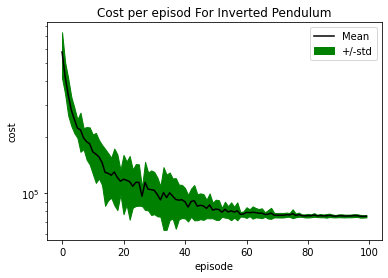

In [51]:
cost_std=np.std(costs_list, axis=0)
cost_ave=np.average(costs_list, axis=0)
x = np.arange(iteration_num)
plt.plot(x,cost_ave,color="black",label='Mean')
plt.fill_between(x,cost_ave+cost_std,cost_ave-cost_std,color="g",label='+/-std')
plt.xlabel("episode")
plt.ylabel("cost")
plt.yscale("log")
plt.title("Cost per episod For Inverted Pendulum")
plt.legend()

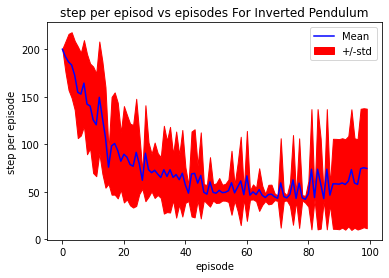

In [52]:
steps_std=np.std(steps, axis=0)
steps_ave=np.mean(steps, axis=0)
#steps_med=np.median(steps, axis=0)
x_ = np.arange(iteration_num)
plt.plot(x_,steps_ave,color="blue",label='Mean')
plt.fill_between(x_,steps_ave+steps_std,steps_ave-steps_std,color="red",label='+/-std')
plt.xlabel("episode")
plt.ylabel("step per episode")
#plt.yscale("log")
plt.title("step per episod vs episodes For Inverted Pendulum")
plt.legend()

Text(0.5, 0, 'steps')

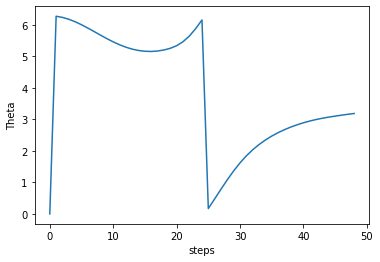

In [28]:

states=np.array(s)
#print(s)
#plt.plot(states[:,0])
plt.plot(states[:,1])
plt.ylabel("Theta")
plt.xlabel("steps")

Text(0.5, 0, 'steps')

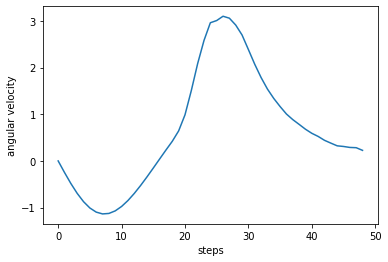

In [29]:
plt.plot(states[:,0])
plt.ylabel("angular velocity")
plt.xlabel("steps")

In [68]:
print(costs_)

[77554.65664678752]
